## Let's Begin

In [1]:
# Install the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# I kept reciving warnings when I executed seaborn codes. I upgraded all the libraries but still did not help.

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv('/Users/virensasalu/Documents/coding/UOA Coding Files/Course 2/Weekly_assignment_w2.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age categories,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Senior Citizen,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Adult,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Youth,2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Youth,2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Adult,2015


In [4]:
# Check the shape of the dataset
df.shape

(4478, 16)

### Question: 1 ( 1 Mark )

Check and Handle the missing values (NaN) present in each column with the respective methods 

In [5]:
AllMissingValues = df.isna().sum()

SelectedColumns = ['armed', 'age', 'gender', 'race', 'flee']
MissingValues = df[SelectedColumns].isna().sum()

print(f"All Missing values in each columns are : {AllMissingValues}")
print()
print(f"Missing values in 'armed', 'age', 'gender', 'race', 'flee' columns are :  \n {MissingValues}")

All Missing values in each columns are : id                           0
name                         0
date                         0
manner_of_death              0
armed                      248
age                        169
gender                       5
race                       373
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       179
body_camera                  0
age categories               0
year                         0
dtype: int64

Missing values in 'armed', 'age', 'gender', 'race', 'flee' columns are :  
 armed     248
age       169
gender      5
race      373
flee      179
dtype: int64


In [6]:
#for Armed I have decided to use 'mode' (central tendency)
df['armed'].fillna(df['armed'].mode().iloc[0], inplace=True)

# for age I have decided to use 'Median' 
df['age'].fillna(df['age'].median(), inplace=True)

#for gender I have decided to usse 'mode'
df['gender'].fillna(df['gender'].mode().iloc[0], inplace=True)

#for race I have decided to use 'mode' (central tendency)
df['race'].fillna(df['race'].mode().iloc[0], inplace=True)

#for flee I have decided to use 'mode' (central tendency)
df['flee'].fillna(df['flee'].mode().iloc[0], inplace=True)

In [7]:
# Check dataframe after handling missing values 

AllMissingValues = df.isna().sum()
print(f'Checking for missing values: \n {AllMissingValues}')

Checking for missing values: 
 id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
age categories             0
year                       0
dtype: int64


### Question: 2 (1 Mark )
Handle the outliers present in the age column 

<module 'matplotlib.pyplot' from '/Users/virensasalu/Documents/coding/anaconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

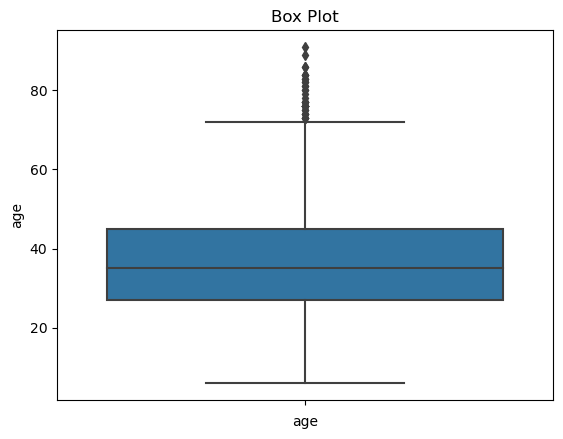

In [8]:
# Display the box plot before handling outliers in the age column
#'<<__A__>>'

sns.boxplot(y=df['age'])
plt.xlabel('age')
plt.title('Box Plot')
plt

### observations 

- In the above analysis, the Median age is close to 35 years
- It is clear that there are maximal outliers. According to the outlier analysis the Outliers begin from the age of 72 years.
- There are 39 specimens of outliers after the age of 72 years
- The IQR is slightly Positively Skewed, Although it can be interpreted as Symmetric (Normal Distribution)
- The IQR range is from 30years to 45 years Approximately

In [9]:
# Quantile 1 of age column (25 percentage)
Q1 = df['age'].quantile(0.25)
# Quantile 3 of age column (75 percentage)
Q3 = df['age'].quantile(0.75)

In [10]:
# Inter Quartile Range
IQR = Q3 - Q1
IQR

18.0

In [11]:
# Outliers present in upper case
UpperCase = Q3 + (1.5*IQR)
print(UpperCase)
# Outliers present in lower case
LowerCase = Q1 - (1.5*IQR)
print(LowerCase)
outliers = df[(df['age'] > UpperCase) | (df['age'] < LowerCase)  ]

print()
print('The Ages which are considered as outliers are','\n',outliers['age'] )

72.0
0.0

The Ages which are considered as outliers are 
 29      75.0
92      74.0
127     77.0
275     83.0
315     76.0
426     86.0
518     76.0
598     77.0
664     76.0
1220    76.0
1434    80.0
1634    82.0
1678    86.0
1801    76.0
1880    83.0
1907    73.0
2162    91.0
2216    73.0
2270    79.0
2347    74.0
2384    75.0
2392    82.0
2646    76.0
3067    78.0
3075    84.0
3148    84.0
3252    81.0
3314    89.0
3345    73.0
3385    77.0
3731    76.0
3741    84.0
3950    81.0
4035    80.0
4151    77.0
4261    76.0
4368    74.0
4388    76.0
4436    73.0
Name: age, dtype: float64


In [12]:
print('The Outliers are :' ,'\n,', outliers)

The Outliers are : 
,         id                  name        date   manner_of_death       armed  \
29      52      Talbot Schroeder  2015-01-14              shot       knife   
92     554           James Allen  2015-02-07              shot         gun   
127    255        Douglas Harris  2015-02-20              shot         gun   
275    357   Richard Dale Weaver  2015-04-12              shot     machete   
315    406         Albert Hanson  2015-04-26              shot         gun   
426    542     Raymond  Phillips  2015-06-11              shot         gun   
518    641      Charles Crandall  2015-07-14              shot         gun   
598    724  Robert Patrick Quinn  2015-08-09              shot  toy weapon   
664    797   Charles Robert Shaw  2015-09-01              shot         gun   
1220  1395   Ralph "Phil" Grenon  2016-03-21  shot and Tasered       knife   
1434  1621       Edward Acquisto  2016-06-13              shot         gun   
1634  1822        Darrel Hetrick  2016-08-

In [13]:
# Remove the outliers in age column
#df['age'] = '<<__B__>>'

df = df[(df['age'] > LowerCase) & (df['age'] < UpperCase)]


# TODO: Code to fill: 

# 1. '<<__B__>>' --> write the your command to remove outliers outside upper case and lower case

<module 'matplotlib.pyplot' from '/Users/virensasalu/Documents/coding/anaconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

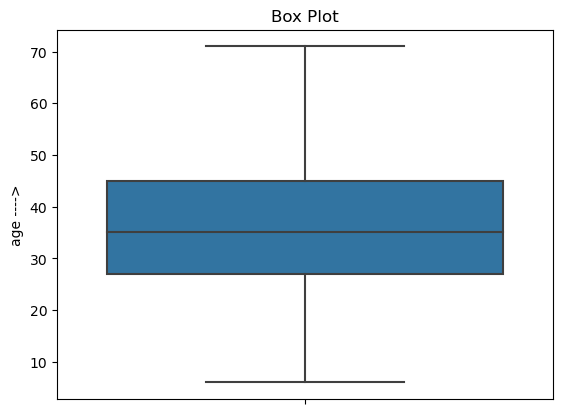

In [14]:
# Display the box plot after handling outliers in the age column

sns.boxplot(y=df['age'])
plt.ylabel('age ---->')
plt.title('Box Plot')

plt

### Observations 
- The Outliers are removed
- The data is opt for further analysis

### Question: 3 ( 1 Mark )
Plot a bar graph which tells most repeated weapons used to attack the people  

<module 'matplotlib.pyplot' from '/Users/virensasalu/Documents/coding/anaconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

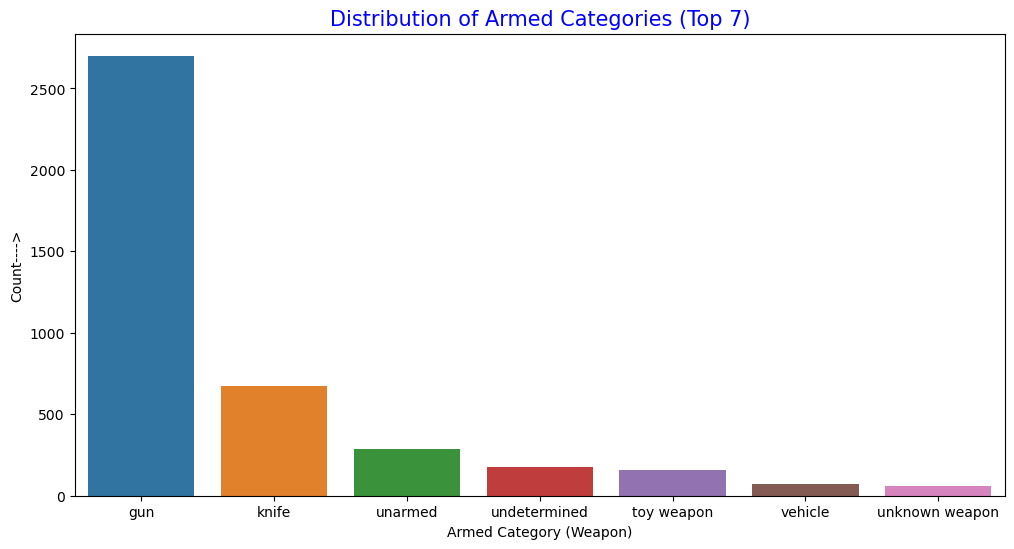

In [15]:
# # Get the value count of armed column

armed = df['armed'].value_counts()

plt.figure(figsize=(12, 6))

sns.barplot(x=armed[:7].index, y=armed[:7].values)

plt.ylabel('Count---->')
plt.xlabel('Armed Category (Weapon)')
plt.title('Distribution of Armed Categories (Top 7)', fontsize=15, color='blue')

plt

### Observations
- From the Plot, it is clear that Gun is most use category of weapon
- Knife is the second used weapon
- Gun is used 246% more than the knife
- There are considerable amount of unarmed suspects and 1/4th of knife were wielding Toy weapon
- these are top 7 weapon category
- Significant amount of suspects used Vehicles as weapon

### Question: 4 ( 2 Marks )
Generate a bar plot to identify days in which the count of attacks are reported most 

In [16]:
# Create a new columns day, month, year using date column with the help of pandas to_datetime method
df['day'] = pd.to_datetime(df['date']).dt.day
df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year

In [17]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age categories,year,day,month
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Senior Citizen,2015,2,1
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Adult,2015,2,1
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Youth,2015,3,1
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Youth,2015,4,1
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Adult,2015,4,1


<module 'matplotlib.pyplot' from '/Users/virensasalu/Documents/coding/anaconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

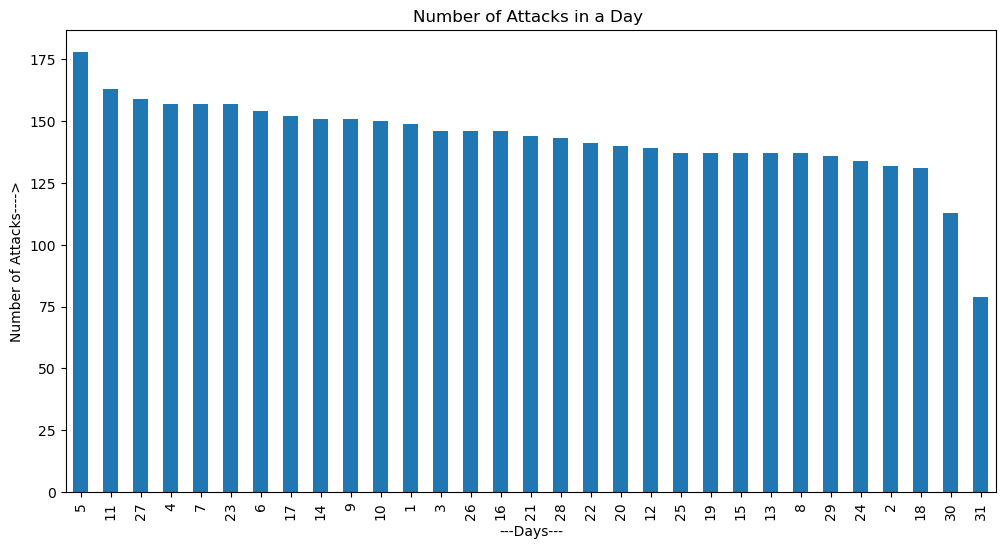

In [18]:
#Plot a bar graph in which days the count of attcks are more

df['day'].value_counts().plot(kind='bar', figsize=(12, 6))

plt.xlabel('---Days---')
plt.ylabel('Number of Attacks---->')
plt.title('Number of Attacks in a Day ')

plt

### Observations
- The representations is clear, on the 5th collectively there were close to 175 attacks 
- Closely followed, on 11th collectively; There were a little over 150 attacks


### Question: 5 ( 2 Marks )
Display the Top 10 states where the high number of cases recorded 

<module 'matplotlib.pyplot' from '/Users/virensasalu/Documents/coding/anaconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

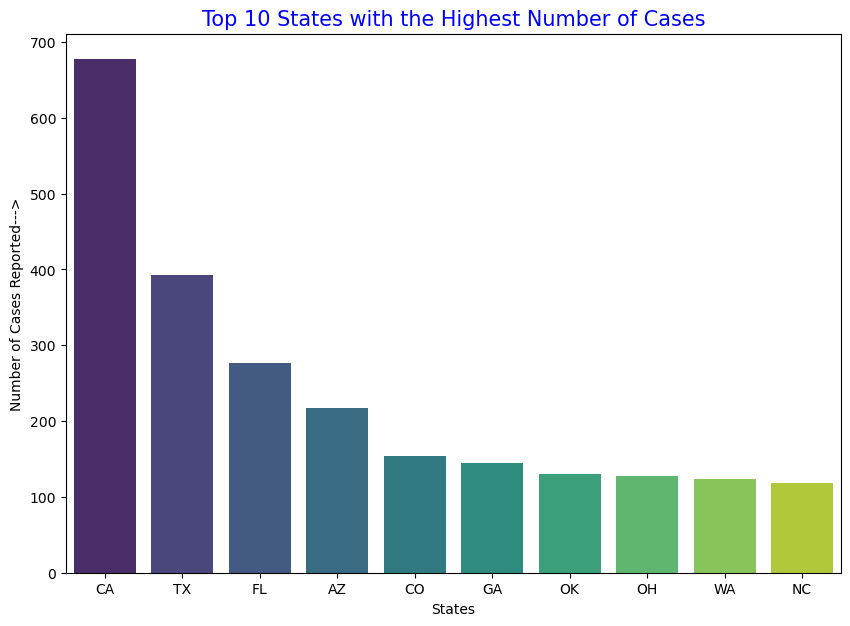

In [19]:
# Write your code here

StateCounts = df['state'].value_counts().head(10)

plt.figure(figsize=(10, 7))
sns.barplot(x=StateCounts.index, y=StateCounts.values, palette='viridis')

plt.ylabel('Number of Cases Reported--->')
plt.xlabel('States')
plt.title('Top 10 States with the Highest Number of Cases', fontsize=15, color='blue')

plt

### Observations
- From the observation of top 10 states with highest number of cases, CA leads with 675 cases
- Followed by Tx which is 41% lesser at 400 cases

### Question: 6 ( 1 Mark )
Drop the features that have more unique string values and not relevant to the model.

In [20]:
# Drop the features that have more unique string values and not relevant to the model.

# unique values such has 'ID', 'name' and 'date'. Although decided to keep 'year', 'day' and 'month'

df.drop(columns=['id', 'name','date'],axis=1,inplace=True)

In [21]:
#Display the top 5 rows of dataset after droping the unnecessary features

df.head(5)
#df.shape

,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age categories,year,day,month
0,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Senior Citizen,2015,2,1
1,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Adult,2015,2,1
2,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Youth,2015,3,1
3,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Youth,2015,4,1
4,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Adult,2015,4,1


### Question: 7 ( 2 Marks )
Create a line plot that shows the number of attacks every year according to race

<module 'matplotlib.pyplot' from '/Users/virensasalu/Documents/coding/anaconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

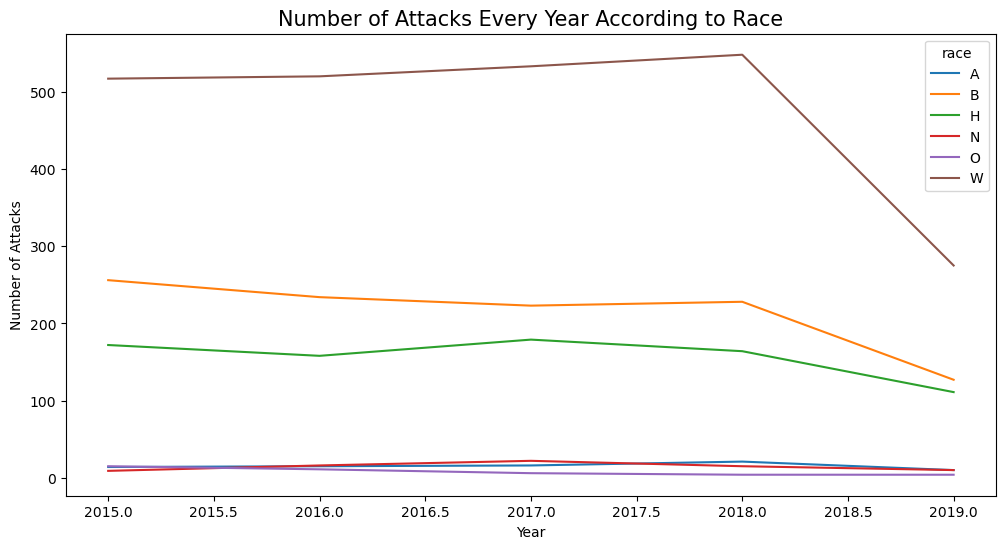

In [22]:
# Write your code here

pd.crosstab(df['year'], df['race']).plot.line(figsize=(12, 6))

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks Every Year According to Race', fontsize=15)

plt

### Observations
- From the representation, Race W has the most number of attacks throughout the years. 
- There was slight incline throughout 2015-2018, after which a sudden sharp fall, continuing to decline over there after
- It’s important to note the population density of each race to make a fair comparison. 
- The race B has pretty much had a declining curve and a steep cut in 2018
- The race H has seen some undulations throughout 
- Rest of the race have pretty much have had the same crime rate.
- Interesting fact to note is that, in 2018 there much have been some new police, law and order reform. Hence the sudden decline in crime rates.


## Thank you!